## Matplotlib Assignment

<b>We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. <br>
Task: <br>
1. fitting it to the periodic function 
2. plot the fit 
Data <br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 <br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 <br><b>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
temp_max=np.array([ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(12)

In [81]:
from scipy import optimize
import numpy as np
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])


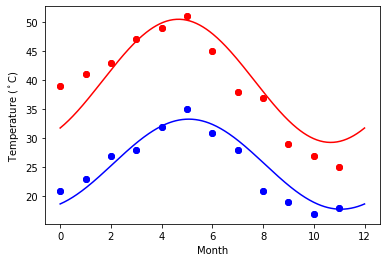

In [82]:
days = np.linspace(0, 12, num=365)
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(df['Max'],'ro',label='Max Temp')
plt.plot(df['Min'],'bo',label='Min Temp')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

<b>This assignment is for visualization using matplotlib:<br>
data to use:<br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv<br>
titanic = pd.read_csv(url)<br>
Charts to plot:<br>

Create a pie chart presenting the male/female proportion<br>
Create a scatterplot with the Fare paid and the Age, differ the plot color by gender<br><b>

In [24]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic=pd.read_csv(url)

In [26]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [32]:
count=titanic['sex'].value_counts()

In [34]:
count

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1bea62cd448>,
 [Text(-0.9616735444189023, 1.978682388349577, 'MALE'),
  Text(0.9616733591612827, -1.9786824783879438, 'FEMALE')],
 [Text(-0.524549206046674, 1.0792813027361328, '64.40%'),
  Text(0.5245491049970633, -1.0792813518479691, '35.60%')])

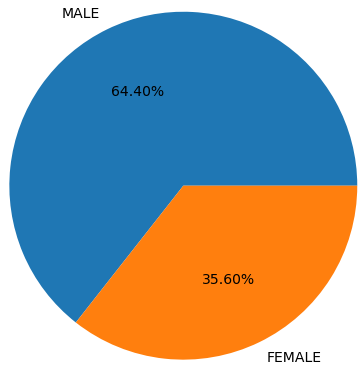

In [50]:
plt.pie(count,labels=['MALE','FEMALE'],autopct='%.2f%%',textprops={'fontsize': 14},radius=2)

Text(0, 0.5, 'Fare')

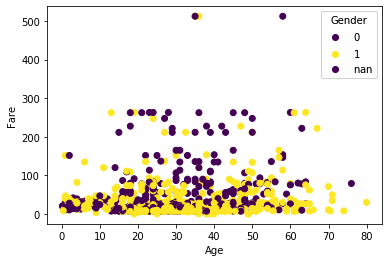

In [80]:
gender={'male':0,'female':1}
fig,ax=plt.subplots()
scatter=ax.scatter(x=titanic['age'],y=titanic['fare'],c=titanic['sex'].apply(lambda x:1 if x=='male' else 0))
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Gender")
ax.add_artist(legend)
plt.xlabel('Age')
plt.ylabel('Fare')
